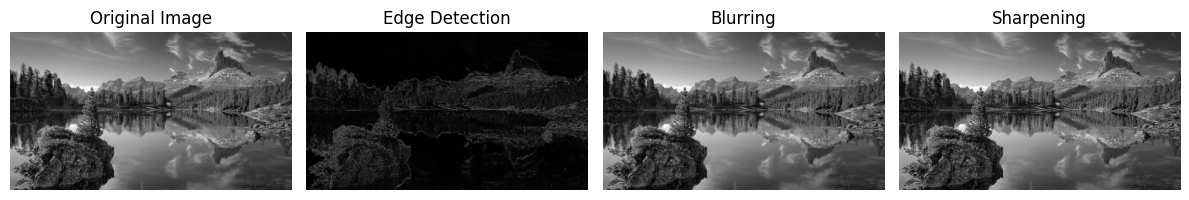

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to perform convolution
def convolve2D(image, kernel, stride=1, padding=0):
    # Get dimensions
    (iH, iW) = image.shape
    (kH, kW) = kernel.shape

    # Apply padding
    if padding > 0:
        image = np.pad(image, ((padding, padding), (padding, padding)), mode="constant")

    # Compute output dimensions
    oH = (iH - kH + 2 * padding) // stride + 1
    oW = (iW - kW + 2 * padding) // stride + 1

    # Initialize output
    output = np.zeros((oH, oW), dtype="float32")

    # Perform convolution
    for y in range(0, oH):
        for x in range(0, oW):
            roi = image[y * stride:y * stride + kH, x * stride:x * stride + kW]
            output[y, x] = (roi * kernel).sum()

    # Normalize output to 0-255 range
    output = np.clip(output, 0, 255).astype(np.uint8)

    return output

# Load grayscale image
image = cv2.imread("/image.jpg", cv2.IMREAD_GRAYSCALE)

# Define different kernels
edge_kernel = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])  # Edge detection kernel

blur_kernel = (1/9) * np.ones((3, 3))  # Blurring kernel

sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])  # Sharpening kernel

# Apply convolution with each kernel
edge_result = convolve2D(image, edge_kernel)
blur_result = convolve2D(image, blur_kernel)
sharpen_result = convolve2D(image, sharpen_kernel)

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(edge_result, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(blur_result, cmap="gray")
plt.title("Blurring")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(sharpen_result, cmap="gray")
plt.title("Sharpening")
plt.axis("off")

plt.tight_layout()
plt.show()